Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000


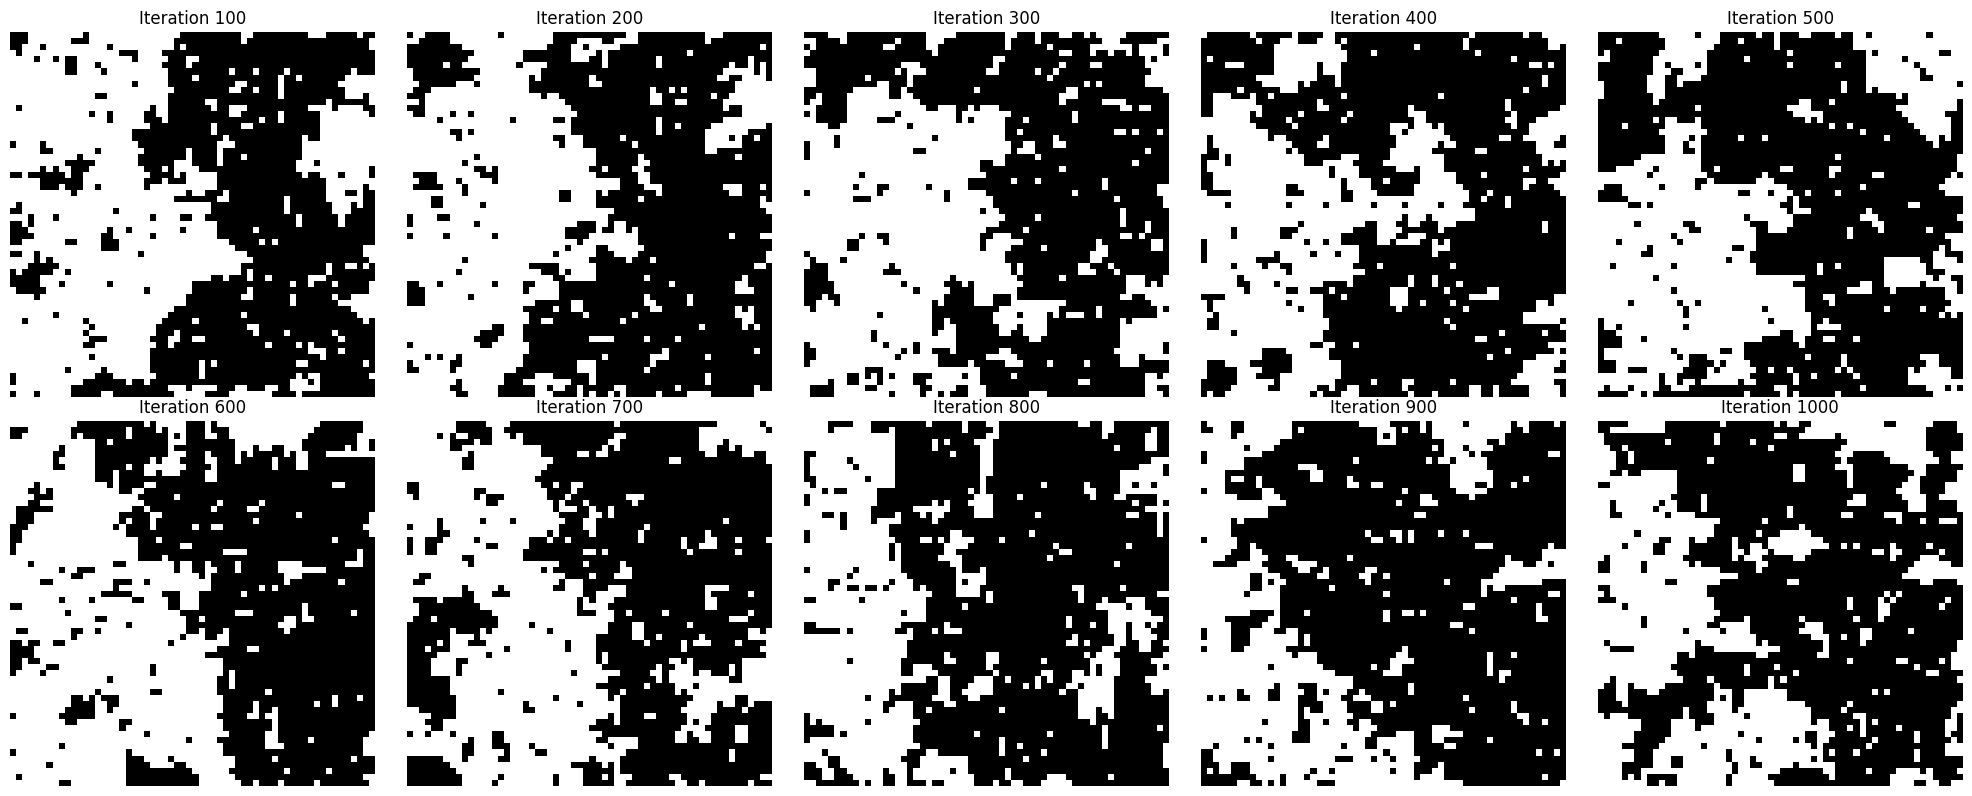

In [ ]:
from graph_helpers import Ising2D, TreeSampler
from gibbs_sampler import GibbsSampler



N = 60  # grid size
theta = 0.45  # param
X = [-1, 1]  # x values
ising_model = Ising2D(N, theta, X)
gibbs_sampler = GibbsSampler(ising_model, initial_state="random")
# node-by-node sampler
gibbs_sampler.node_by_node_gibbs(num_iterations=1000, plot_interval=100)

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000


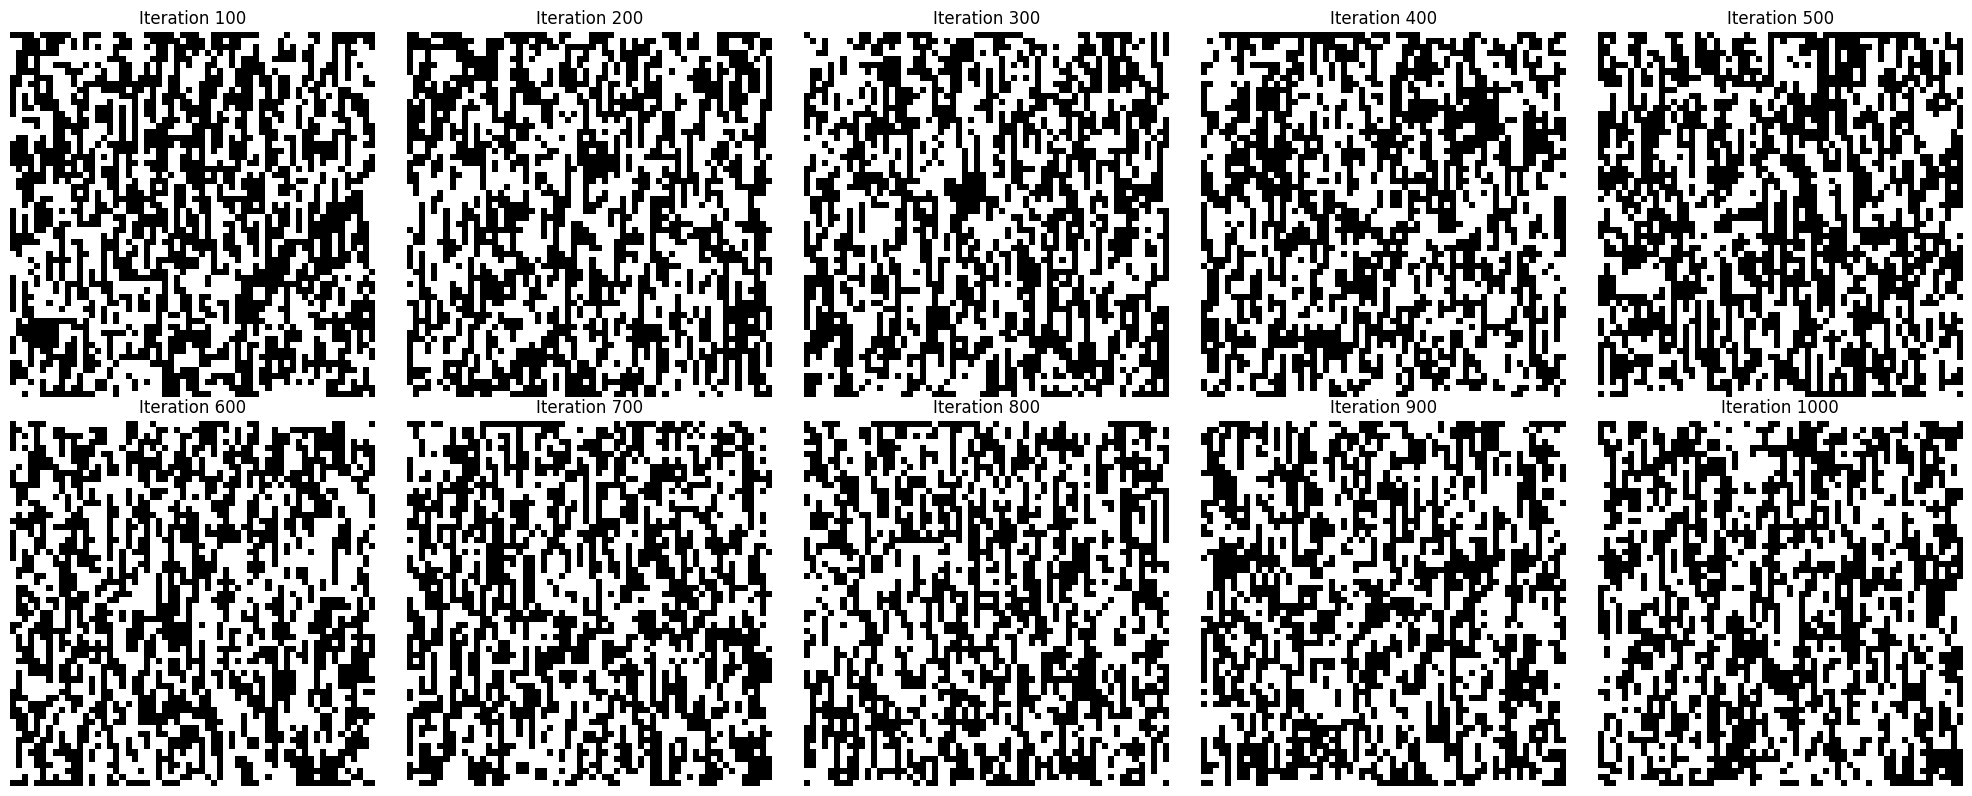

In [2]:
# block gibbs sampler
gibbs_sampler.block_gibbs_sampler(num_iterations=1000, plot_interval=100)

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000


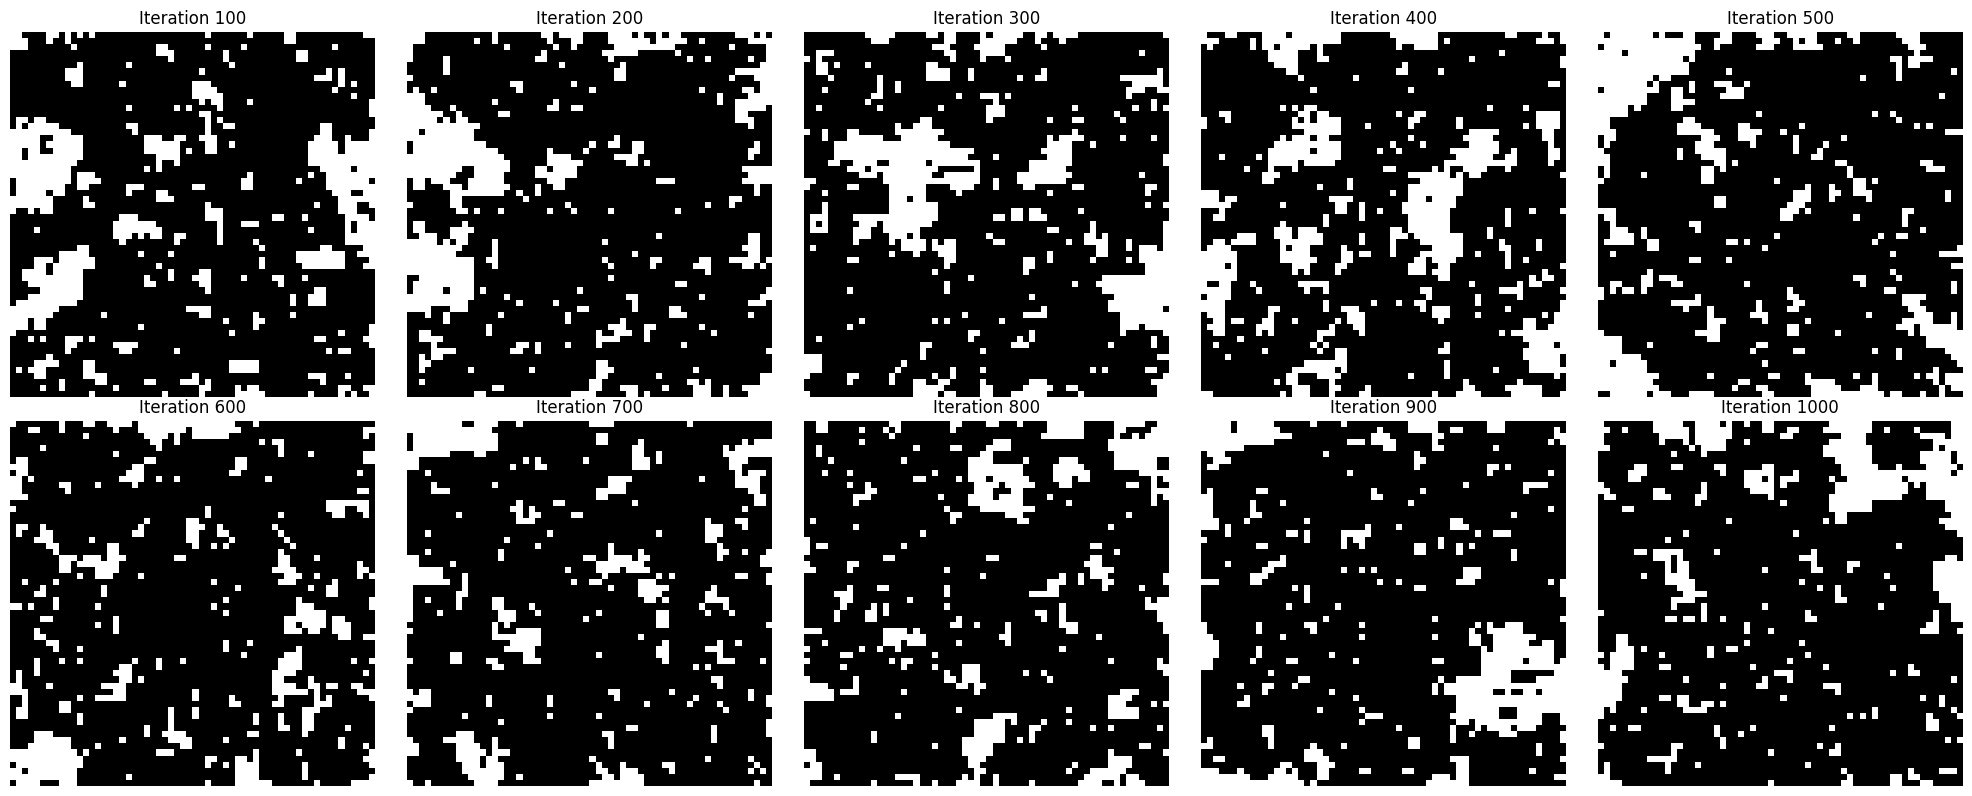

In [2]:
N = 60  # grid size
theta = 0.45  # param
X = [-1, 1]  # x values
ising_model = Ising2D(N, theta, X)
gibbs_sampler = GibbsSampler(ising_model, initial_state="all_pos")
# node-by-node sampler
gibbs_sampler.node_by_node_gibbs(
    num_iterations=1000, plot_interval=100, initial_state="all_pos"
)

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000


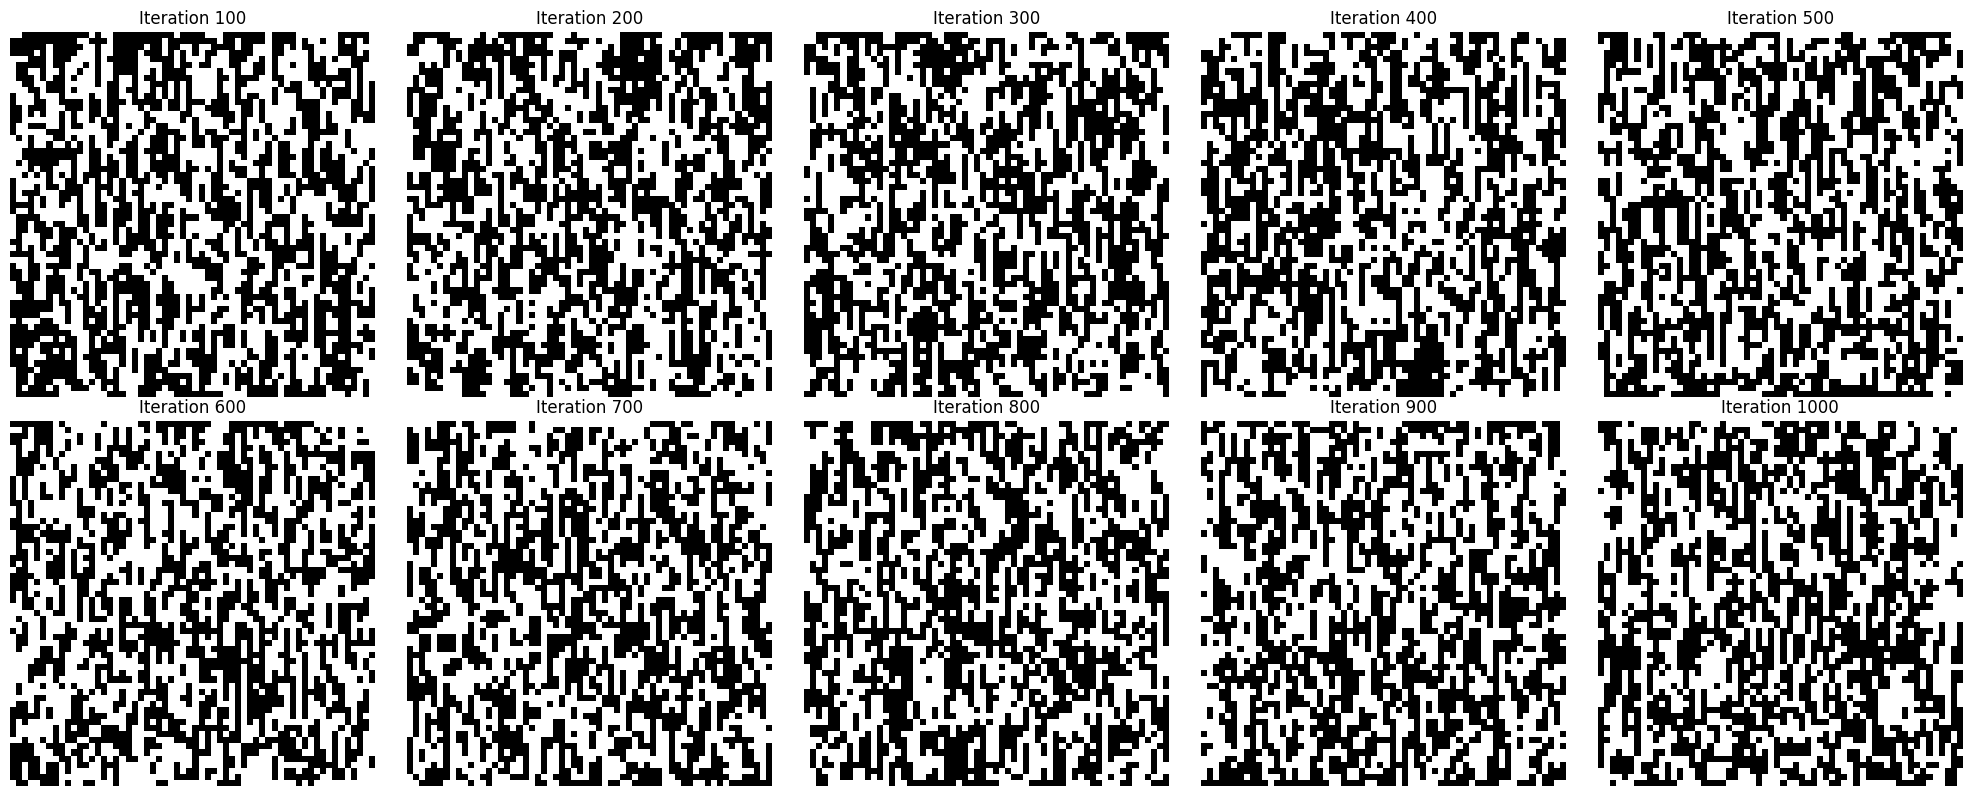

In [3]:
# block gibbs sampler
gibbs_sampler.block_gibbs_sampler(
    num_iterations=1000, plot_interval=100, initial_state="all_pos"
)

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000


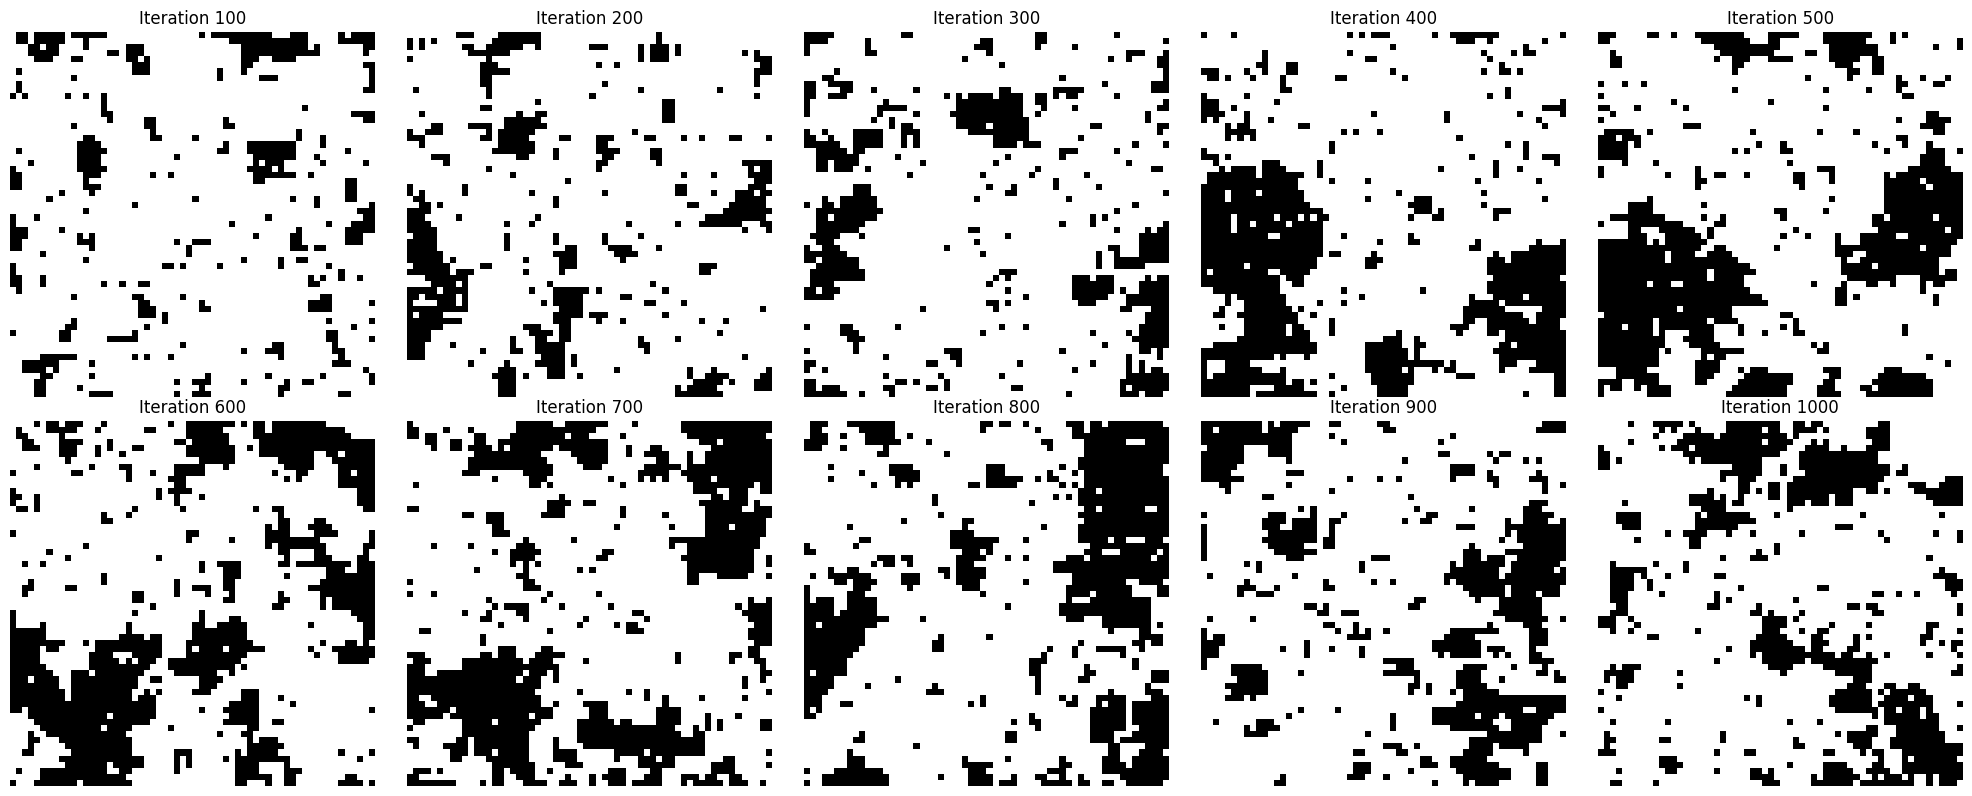

In [4]:
gibbs_sampler.node_by_node_gibbs(
    num_iterations=1000, plot_interval=100, initial_state="all_neg"
)

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000


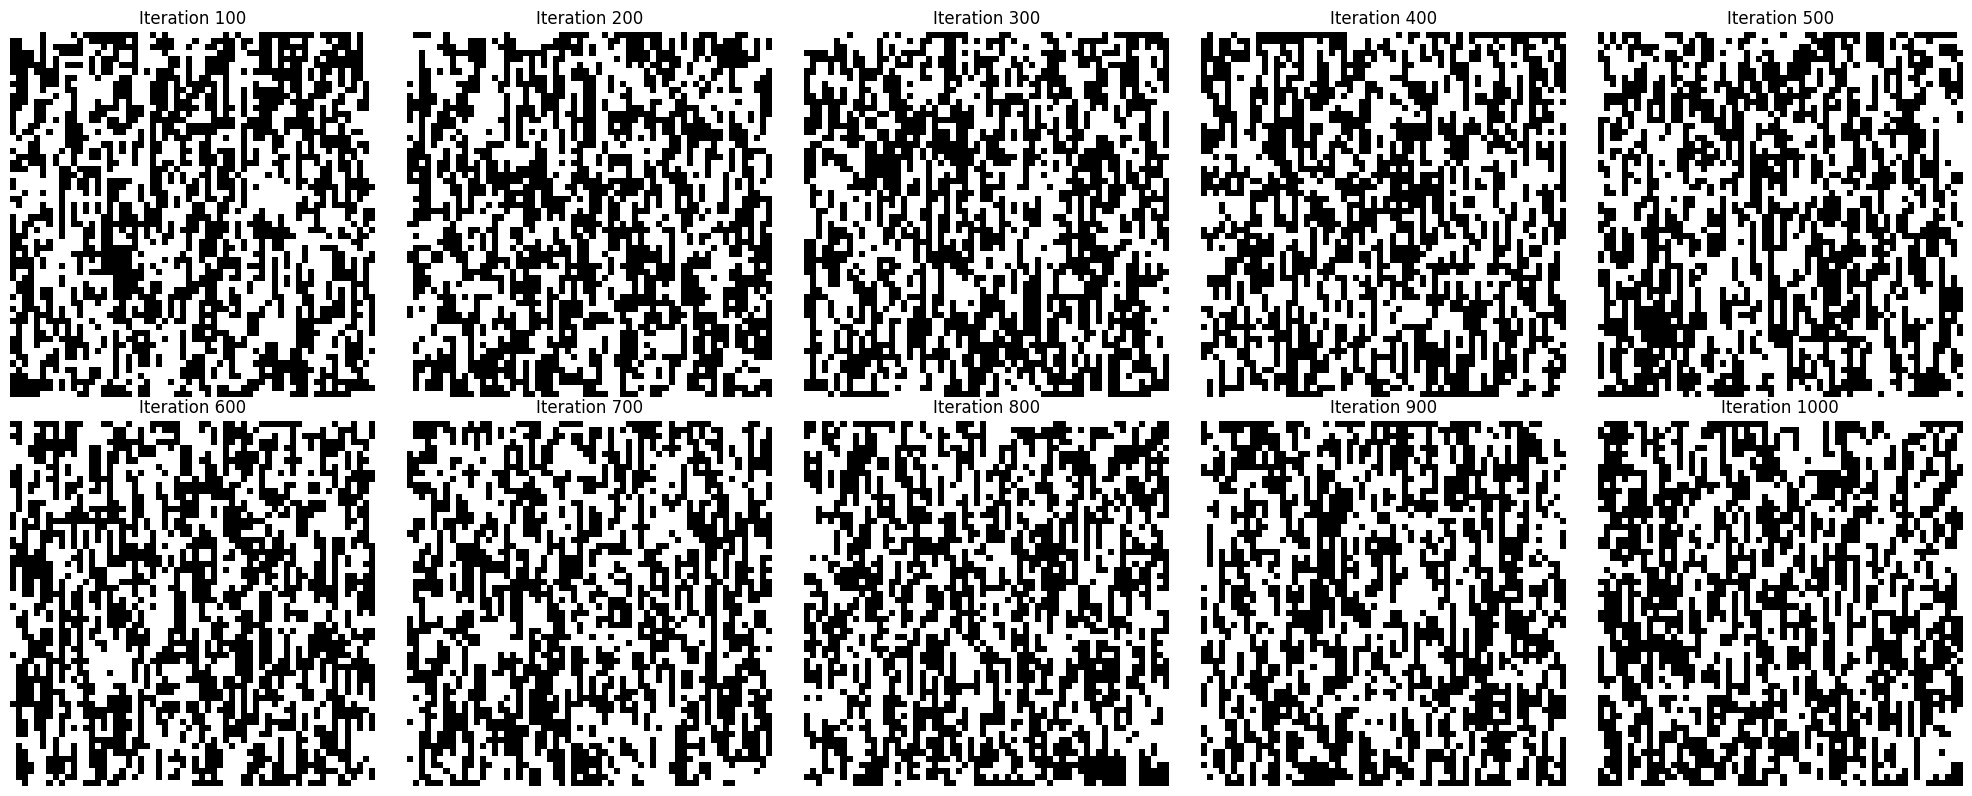

In [5]:
# block gibbs sampler
gibbs_sampler.block_gibbs_sampler(
    num_iterations=1000, plot_interval=100, initial_state="all_neg"
)

# 5.1

List of Key Routines and Their Functionalities:

1. **GraphModel Class**:

- ```__init__(self, node_potentials, edge_potentials)```: Initializes the undirected graphical model by setting up node potentials and edge potentials.
- ```get_V(self)```: Returns the list of nodes in the graph.
- ```get_E(self)```: Returns the list of edges in the graph.
- ```get_neighbors(self, i)```: Returns the neighbors of a given node i.
- ```visualize(self, output_file=None, show_potentials=False)```: Visualizes the graph structure, optionally displaying potentials.

2. **Ising2D Class**:
- ```__init__(self, N, theta, X=[-1, 1])```: Initializes a 2D Ising model on an N x N grid with coupling parameter theta and possible spin values X.
- ```generate_2Dising(self, N, theta, X)```: Generates the 2D Ising model graph using the GraphModel class.
- ```visualize(self, sample_state)```: Visualizes the Ising model grid based on the current spin states.
- ```split_and_calculate_trees(self)```: Splits the Ising graph into two trees (blocks A and B) for block Gibbs sampling and calculates the conditional potentials for each tree.
- ```calculate_tree_potentials(self, tree_nodes, other_tree_nodes, edges, theta)```: Calculates the node and edge potentials for a given tree, considering the influence of the other tree.

3. **TreeSampler Class**:

- ```__init__(self, tree, X=[-1, 1])```: Initializes the tree sampler with a tree graph and possible spin values.
- ```compute_message(self, i, j, messages)```: Computes the messages passed from node i to node j during belief propagation, using log-space computations for numerical stability.
- ```sum_product(self)```: Performs the sum-product algorithm on the tree to compute the messages needed for exact sampling.
- ```sample(self)```: Samples from the joint distribution of the tree using the computed messages, enabling exact sampling of the tree's spin states.

4. **GibbsSampler Class**:
- ```__init__(self, ising_model, initial_state='random')```: Initializes the Gibbs sampler with an Ising model and an initial spin state.
initialize_state(self, initial_state): Initializes the state of the spins based on the specified initial state ('random', 'all_ones', 'all_minus_ones', or a given state).
- ```node_by_node_gibbs(self, num_iterations=1000, plot_every=100)```: Performs node-by-node Gibbs sampling by iteratively updating each node's spin based on its conditional distribution given its neighbors. Each iteration corresponds to a full sweep over all nodes.
- ```block_gibbs_sampler(self, num_iterations=1000, plot_every=100)```: Performs block Gibbs sampling by alternating between sampling the two subgraphs (trees) A and B, effectively updating large blocks of nodes at each iteration.
- ```plot_samples(self, collected_samples, iterations)```: Plots the collected samples at specified intervals to visualize the sampling progress.


# 5.2

## Node-by-node sampler

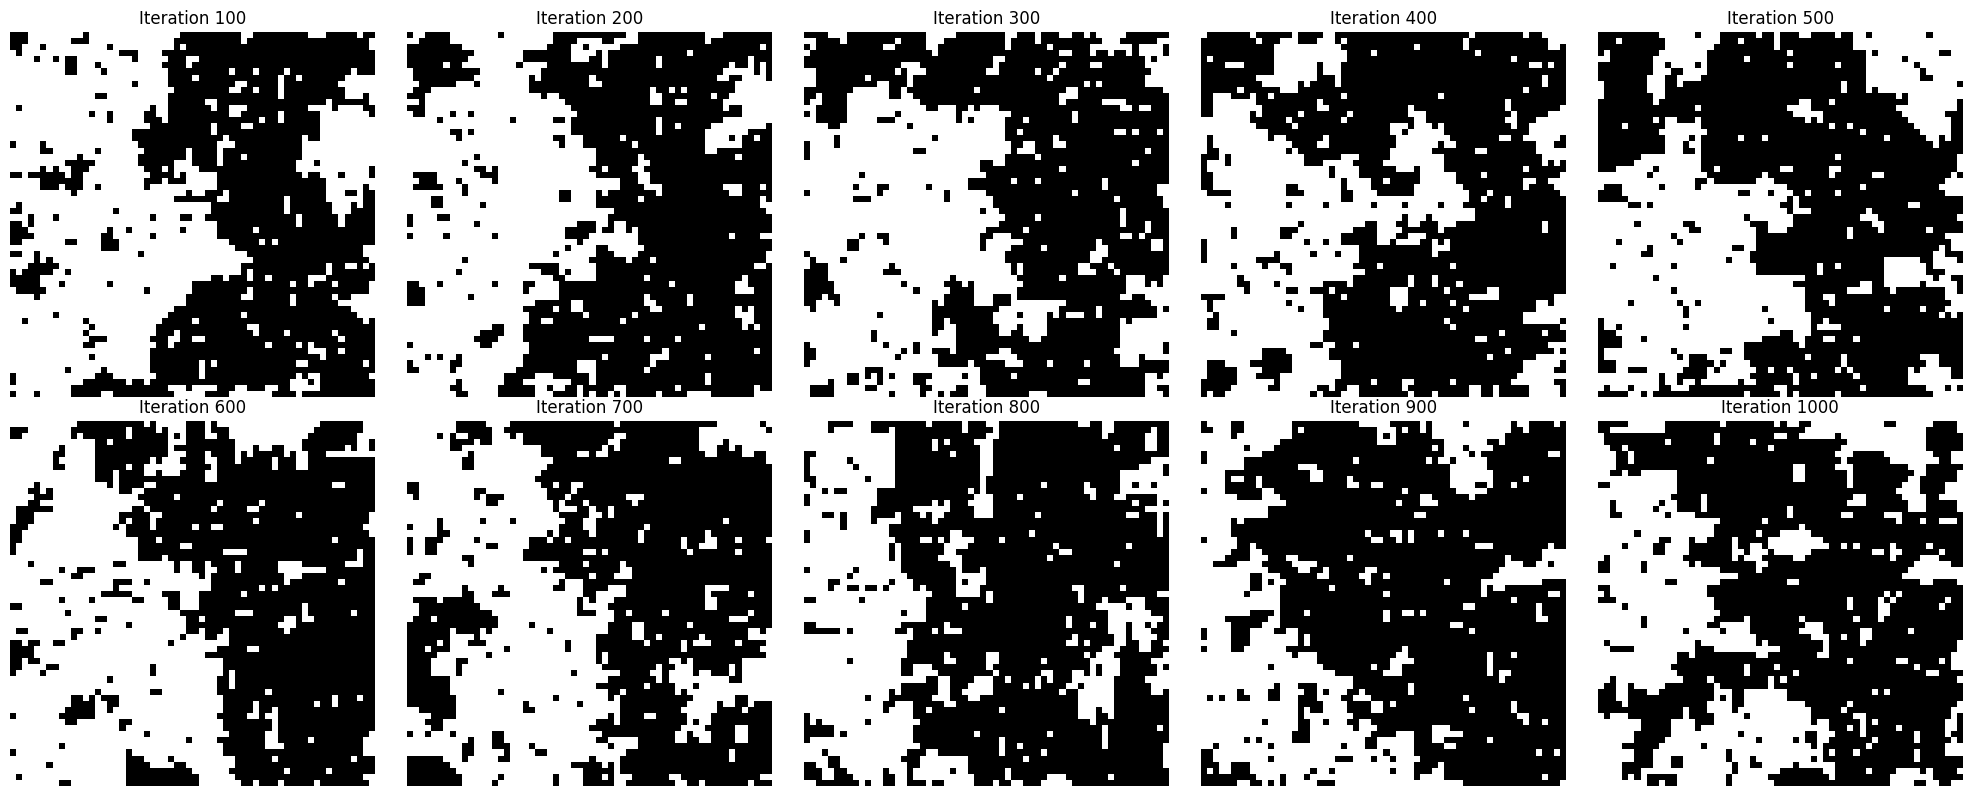

## Block sampler

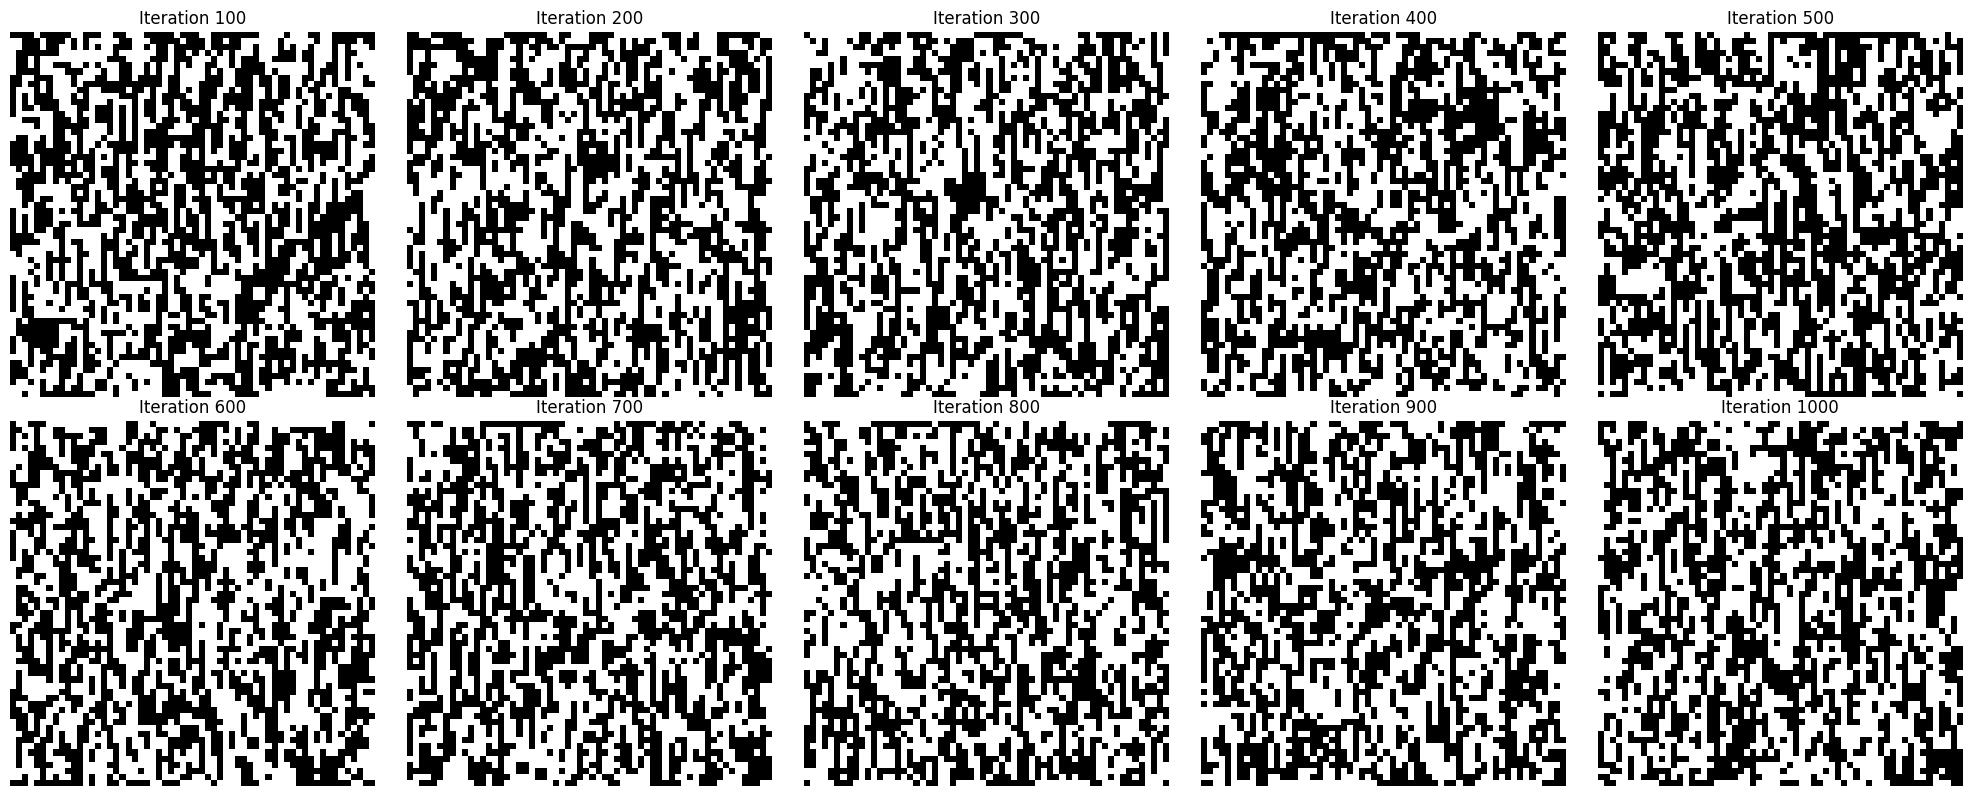

## 5.3

**initialize with all +1** \
node-by-node:

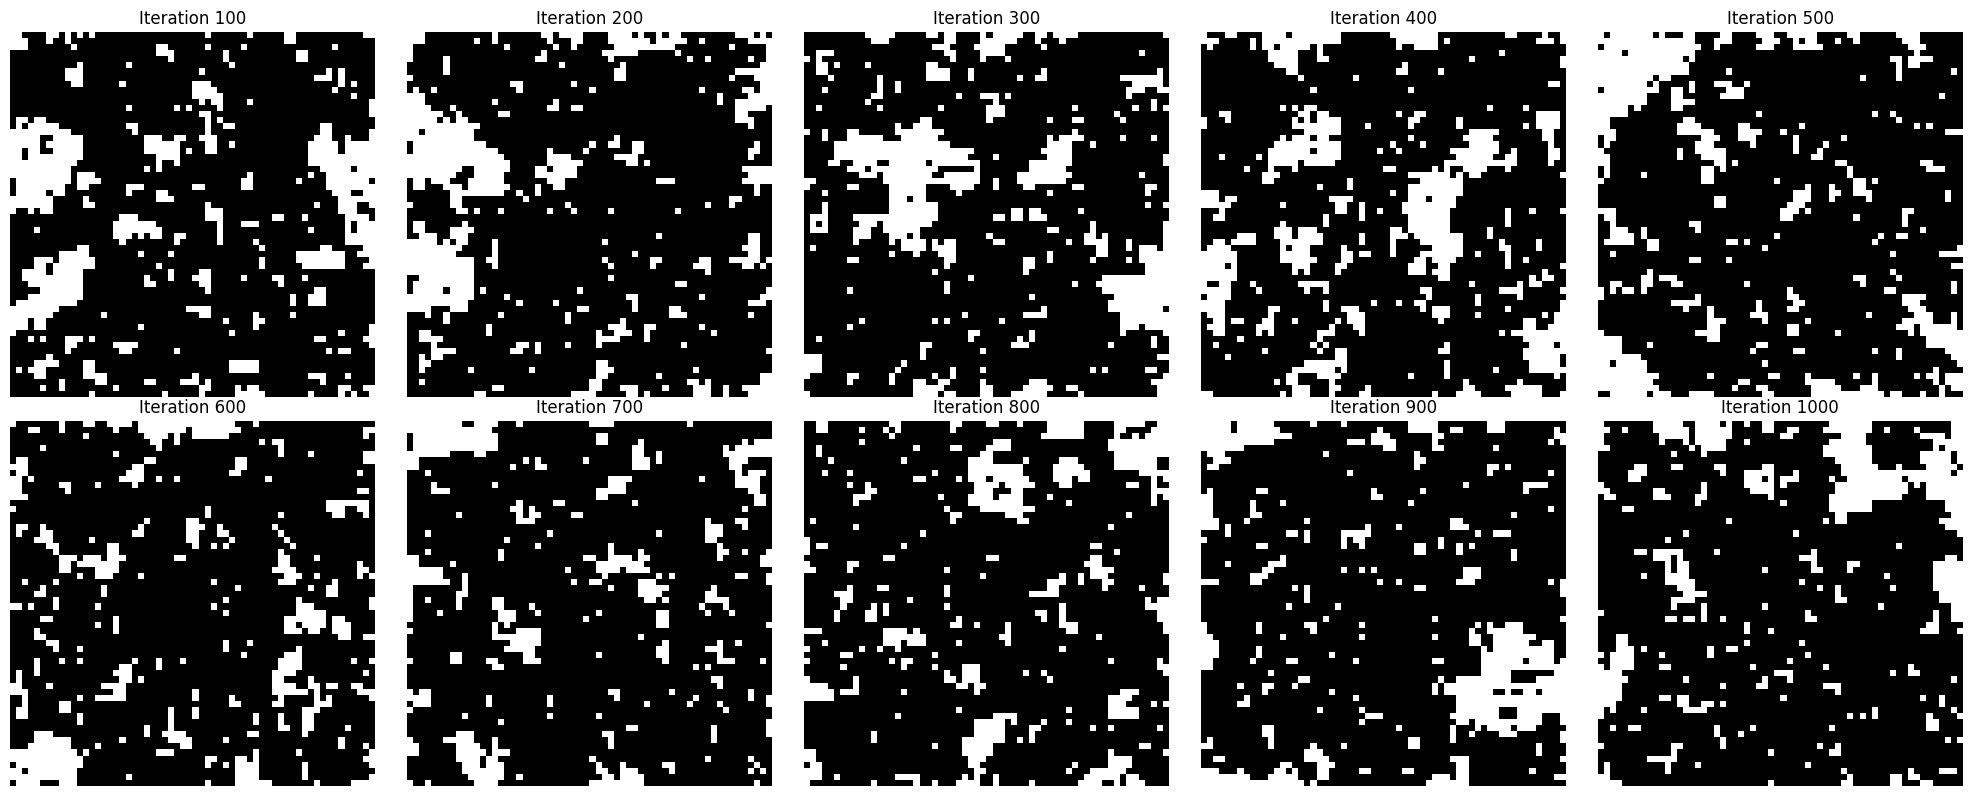

block gibbs sampler

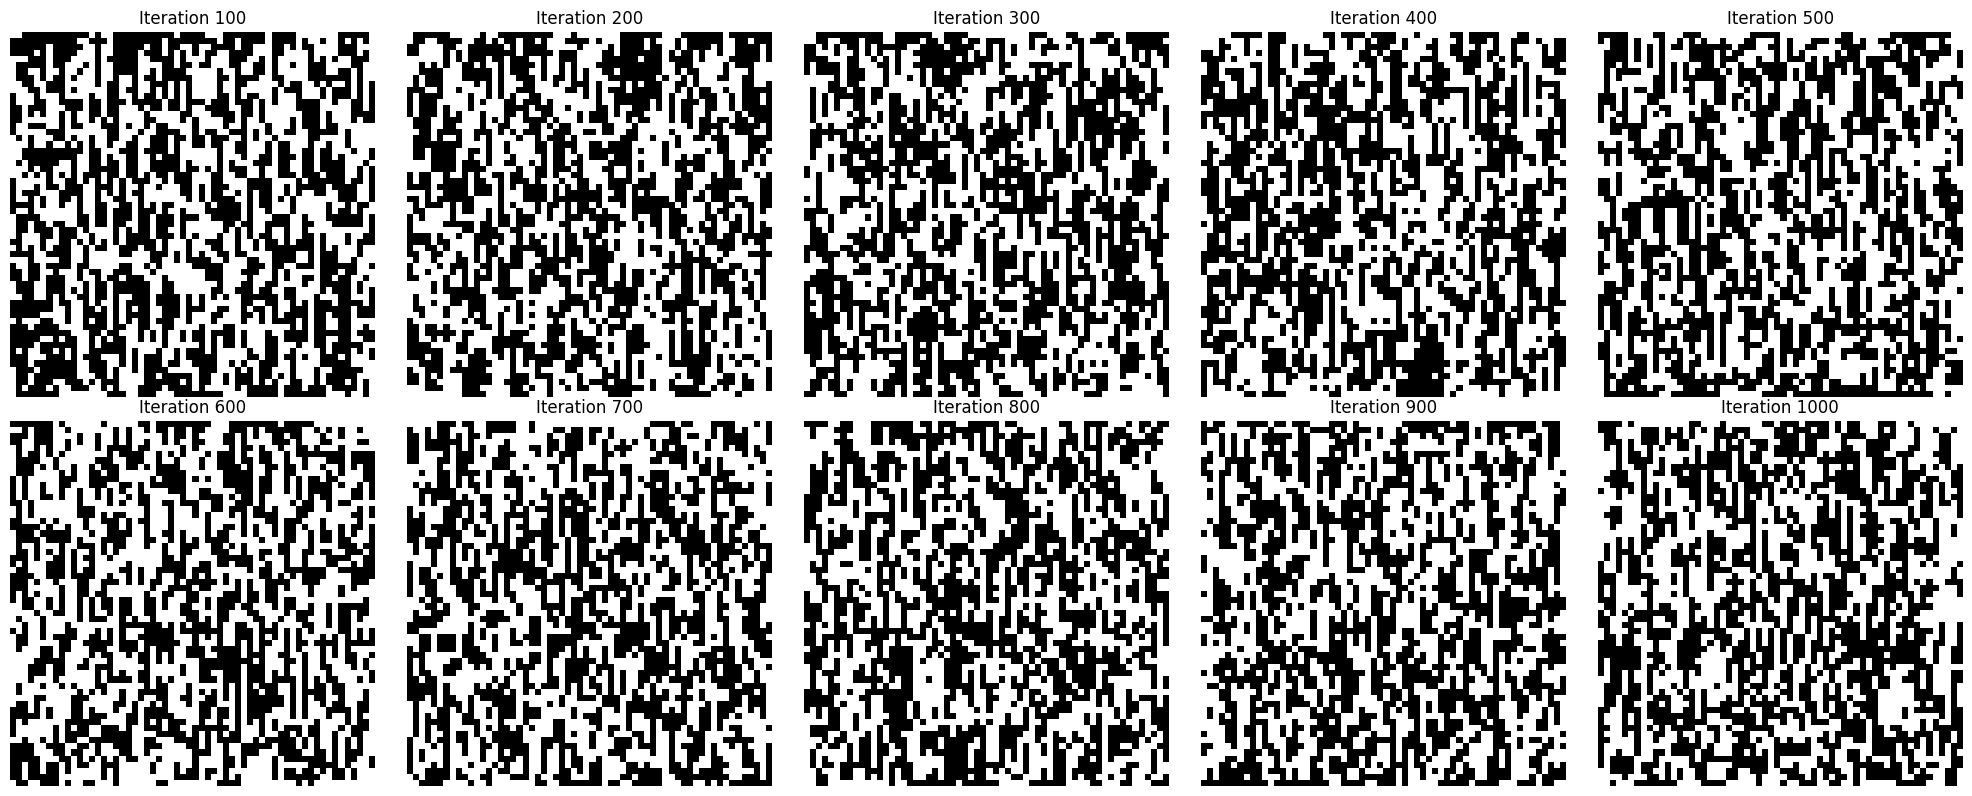

**initialize with all -1** \
node-by-node:
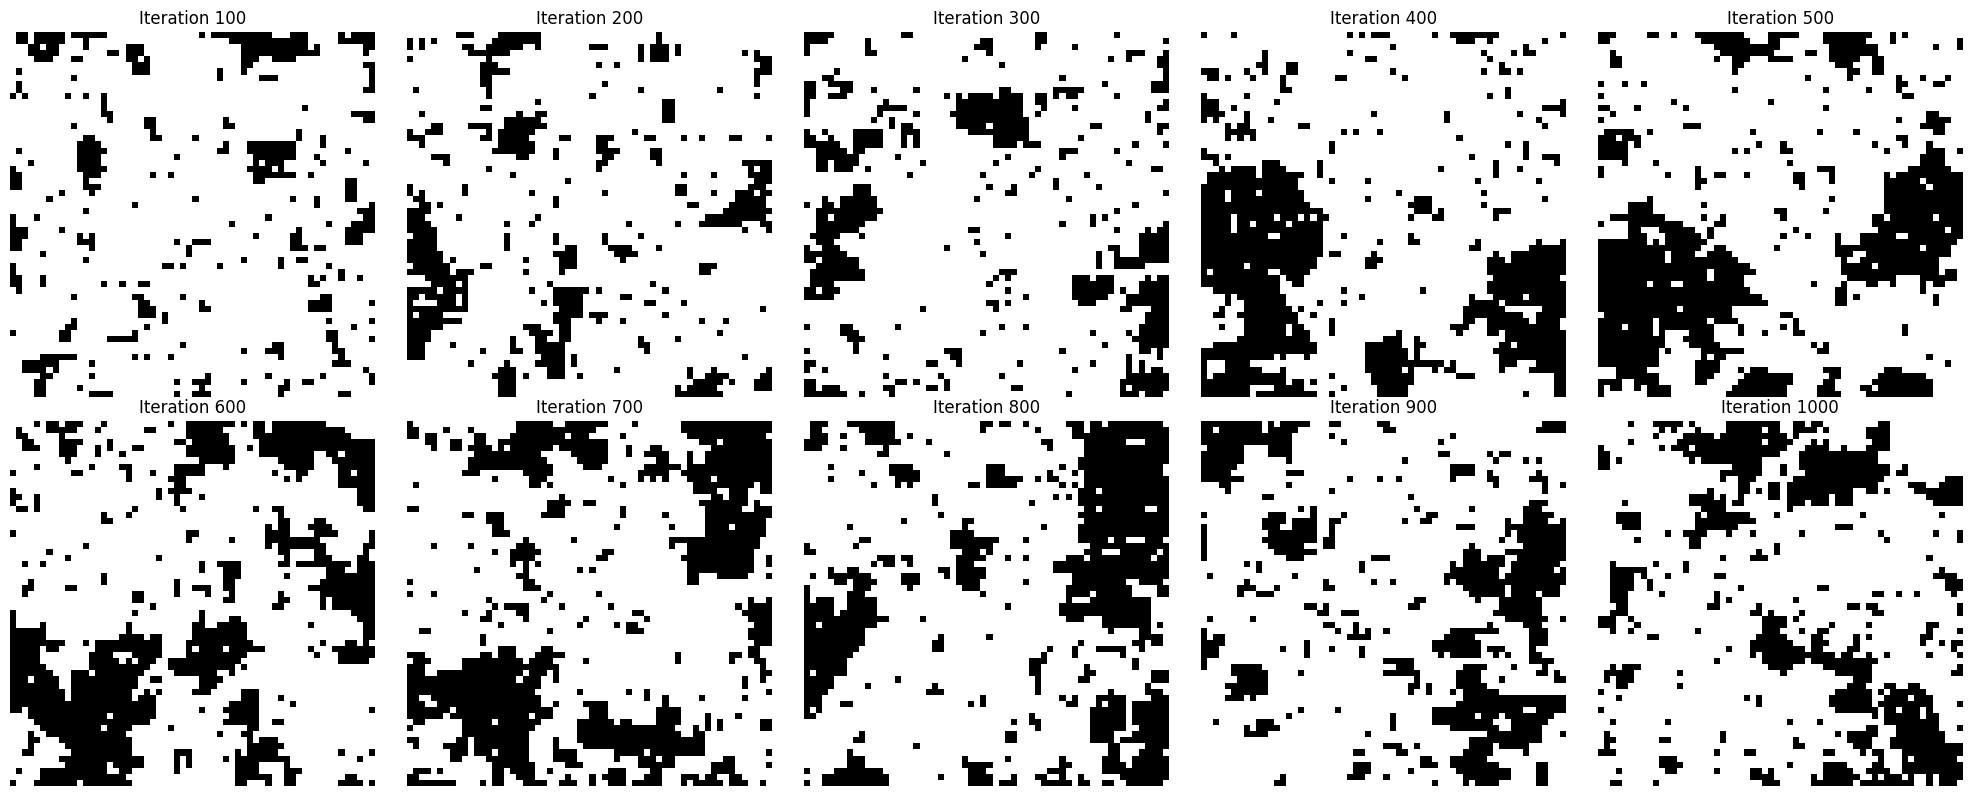

block gibbs sampler
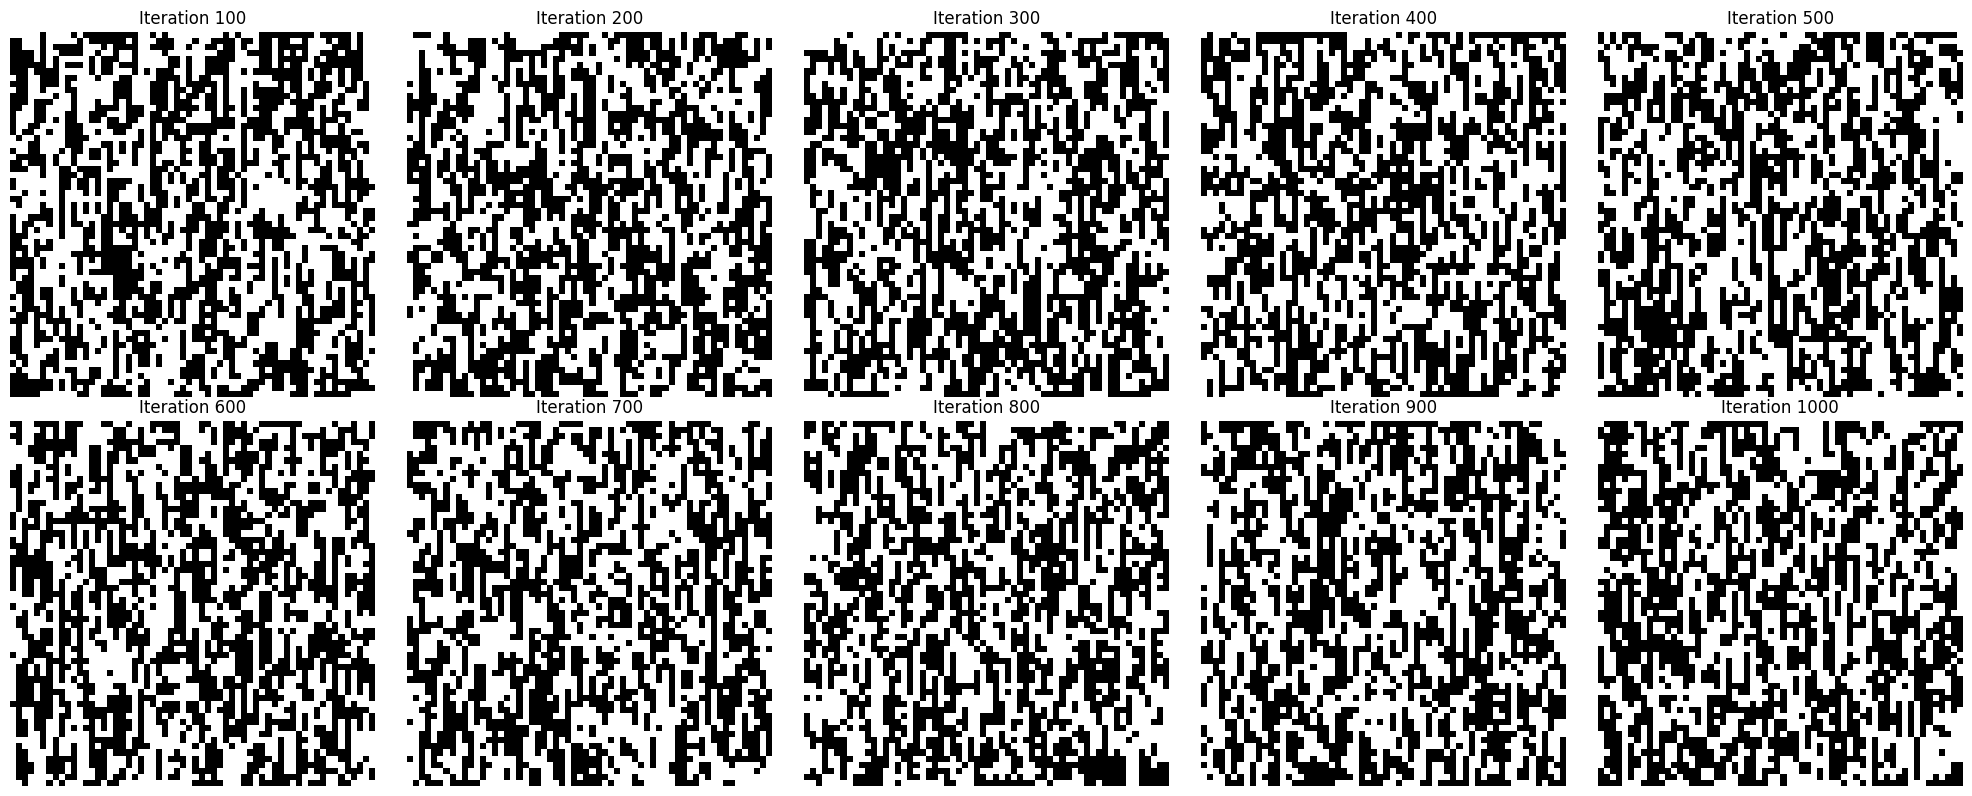